# Project: Investigate a Dataset (Tmdb-movies)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project, we will be analyzing dataset containing information associated with 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

And in particular, we will be interested in answering the following questions;

1. Which genres are most popular across all years? 
2. What genre of movies generated the most revenue?
3. What Genre generated the most revenue?
4. 10 most expensive and least expensive movies
5. 10 high revenue and low-revenue movies

In [1]:
#import your packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In this section of the report, I will load in the data, check for cleanliness, and then trim and clean your dataset for analysis.

### General Properties

In [2]:
#load your data

df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.tail()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [4]:
#summary of our dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

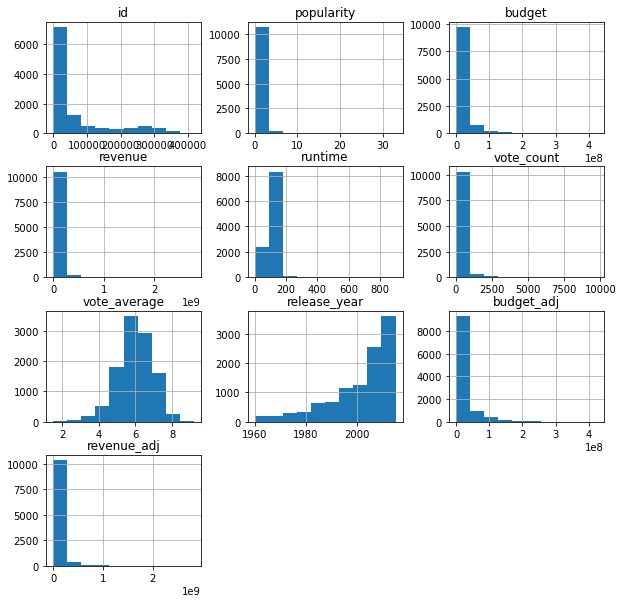

In [5]:
df.hist(figsize=(10,10));
df.info()

### Data Cleaning 

After taking a closer look and questions i've asked about my dataset, i will remove irrelevant columns and check for duplicate rows.


In [6]:
#let's check for duplicate rows

df.duplicated().sum()

1

In [7]:
#drop these duplicated rows 

df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  int64  
 1   imdb_id               10855 non-null  object 
 2   popularity            10865 non-null  float64
 3   budget                10865 non-null  int64  
 4   revenue               10865 non-null  int64  
 5   original_title        10865 non-null  object 
 6   cast                  10789 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10821 non-null  object 
 9   tagline               8041 non-null   object 
 10  keywords              9372 non-null   object 
 11  overview              10861 non-null  object 
 12  runtime               10865 non-null  int64  
 13  genres                10842 non-null  object 
 14  production_companies  9835 non-null   object 
 15  release_date       

In [8]:
# check for empty rows in our data columns

df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [9]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [10]:
#create new df with just the columns relevant for this analysis

df_clean = df[['genres', 'original_title', 'popularity', 'id', 'budget', 'revenue', 'release_date', 'release_year', 'vote_count', 'vote_average', 'production_companies']]
df_clean.head()

,genres,original_title,popularity,id,budget,revenue,release_date,release_year,vote_count,vote_average,production_companies
0,Action|Adventure|Science Fiction|Thriller,Jurassic World,32.985763,135397,150000000,1513528810,6/9/15,2015,5562,6.5,Universal Studios|Amblin Entertainment|Legenda...
1,Action|Adventure|Science Fiction|Thriller,Mad Max: Fury Road,28.419936,76341,150000000,378436354,5/13/15,2015,6185,7.1,Village Roadshow Pictures|Kennedy Miller Produ...
2,Adventure|Science Fiction|Thriller,Insurgent,13.112507,262500,110000000,295238201,3/18/15,2015,2480,6.3,Summit Entertainment|Mandeville Films|Red Wago...
3,Action|Adventure|Science Fiction|Fantasy,Star Wars: The Force Awakens,11.173104,140607,200000000,2068178225,12/15/15,2015,5292,7.5,Lucasfilm|Truenorth Productions|Bad Robot
4,Action|Crime|Thriller,Furious 7,9.335014,168259,190000000,1506249360,4/1/15,2015,2947,7.3,Universal Pictures|Original Film|Media Rights ...


In [11]:
df_clean.isnull().sum()

genres                    23
original_title             0
popularity                 0
id                         0
budget                     0
revenue                    0
release_date               0
release_year               0
vote_count                 0
vote_average               0
production_companies    1030
dtype: int64

We can leave the missing values as they are since this is a descriptive analysis and I wouldn't want to change the integrity of the data since I can still carry out my analysis regardless.

<a id='eda'></a>
## Exploratory Data Analysis


### Question 1: Which genres are most popular across the years?

In [12]:
df_clean.genres.head()

0    Action|Adventure|Science Fiction|Thriller
1    Action|Adventure|Science Fiction|Thriller
2           Adventure|Science Fiction|Thriller
3     Action|Adventure|Science Fiction|Fantasy
4                        Action|Crime|Thriller
Name: genres, dtype: object

In [13]:
df_clean.head()

,genres,original_title,popularity,id,budget,revenue,release_date,release_year,vote_count,vote_average,production_companies
0,Action|Adventure|Science Fiction|Thriller,Jurassic World,32.985763,135397,150000000,1513528810,6/9/15,2015,5562,6.5,Universal Studios|Amblin Entertainment|Legenda...
1,Action|Adventure|Science Fiction|Thriller,Mad Max: Fury Road,28.419936,76341,150000000,378436354,5/13/15,2015,6185,7.1,Village Roadshow Pictures|Kennedy Miller Produ...
2,Adventure|Science Fiction|Thriller,Insurgent,13.112507,262500,110000000,295238201,3/18/15,2015,2480,6.3,Summit Entertainment|Mandeville Films|Red Wago...
3,Action|Adventure|Science Fiction|Fantasy,Star Wars: The Force Awakens,11.173104,140607,200000000,2068178225,12/15/15,2015,5292,7.5,Lucasfilm|Truenorth Productions|Bad Robot
4,Action|Crime|Thriller,Furious 7,9.335014,168259,190000000,1506249360,4/1/15,2015,2947,7.3,Universal Pictures|Original Film|Media Rights ...


In [14]:
df_clean.shape

(10865, 11)

In [15]:
# splitting the genre column for analysis
s = df_clean['genres'].str.split('|').apply(Series, 1).stack()
s.index = s.index.droplevel(-1)
s.name = 'genres'
df_updated = df_clean.copy()
del df_updated['genres']
df_updated = df_updated.join(s)
df_updated.head()

,original_title,popularity,id,budget,revenue,release_date,release_year,vote_count,vote_average,production_companies,genres
0,Jurassic World,32.985763,135397,150000000,1513528810,6/9/15,2015,5562,6.5,Universal Studios|Amblin Entertainment|Legenda...,Action
0,Jurassic World,32.985763,135397,150000000,1513528810,6/9/15,2015,5562,6.5,Universal Studios|Amblin Entertainment|Legenda...,Adventure
0,Jurassic World,32.985763,135397,150000000,1513528810,6/9/15,2015,5562,6.5,Universal Studios|Amblin Entertainment|Legenda...,Science Fiction
0,Jurassic World,32.985763,135397,150000000,1513528810,6/9/15,2015,5562,6.5,Universal Studios|Amblin Entertainment|Legenda...,Thriller
1,Mad Max: Fury Road,28.419936,76341,150000000,378436354,5/13/15,2015,6185,7.1,Village Roadshow Pictures|Kennedy Miller Produ...,Action


In [16]:
df_updated.shape

(26978, 11)

In [17]:
df_updated['popularity'].mean()

0.7056529185632799

In [18]:
#find the mean genre and popularity with groupby

genre_popularity = pd.DataFrame(df_updated.groupby('genres')['popularity'].mean()).sort_values('popularity', ascending = True)
genre_popularity

,popularity
genres,
Documentary,0.181432
Foreign,0.191496
TV Movie,0.270896
Horror,0.465357
Music,0.487321
History,0.575936
Western,0.590615
Drama,0.591495
Romance,0.592082


In [19]:
# Create a function to plot a bar chart
def df_bar(column_name, title):
    column_name.plot.barh(stacked=True, title = title, figsize = (8,8));
   

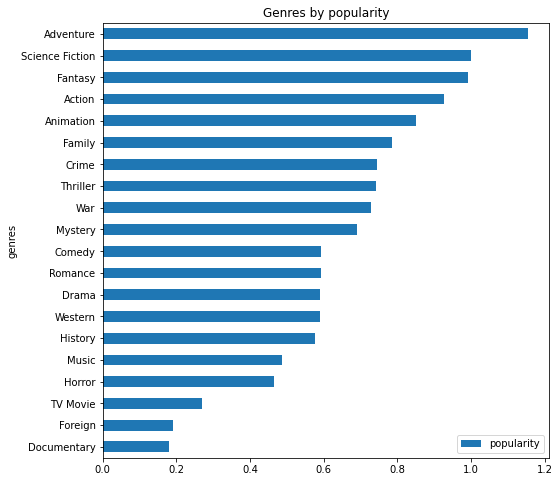

In [20]:
#plot in a bar chart

df_bar(genre_popularity[['popularity']], "Genres by popularity")

# genre_popularity[['popularity']].plot.barh(stacked=True, title = 'Genres by popularity', figsize = (8,8));

From the above chart, we can see that the **Adventure** genre is the most popular on average followed by **Science Fiction**.
The least popular genre is **Documentary**.

### Question 2: What is the relationship between the budget of a movie and revenue?

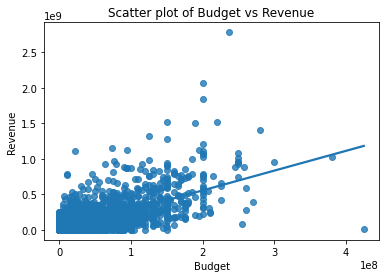

In [21]:
#find the correlation using scatter plot

sns.regplot(x = 'budget', y = 'revenue', ci = None, data = df_clean)
plt.title('Scatter plot of Budget vs Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()

In [22]:
df_clean['budget'].corr(df_clean['revenue'])

0.7349279812889288

From the above, we can see that there is a positive correlation between budget and revenue. Overall, as budget increases revenue tend to increase also.

### Question 3: What Genre generated the most revenue?

In [23]:
genre_revenue = pd.DataFrame(df_updated.groupby('genres')['revenue'].sum()).sort_values('revenue', ascending = True)
genre_revenue

,revenue
genres,
TV Movie,42000000
Foreign,285846449
Documentary,1061375637
Western,4713837032
History,10691938934
Music,11657281626
War,12853399491
Horror,27538937718
Mystery,32576228996


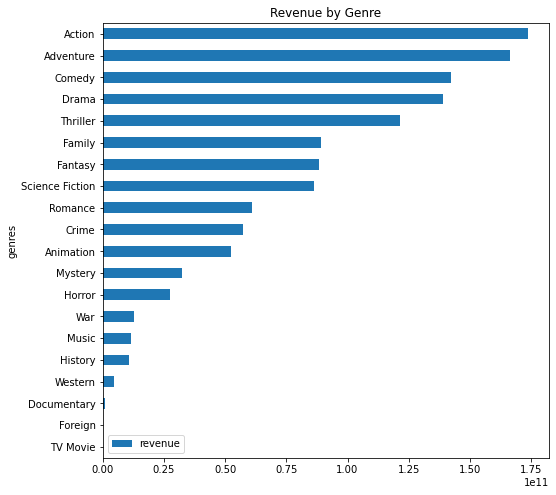

In [24]:
# Plot chart using df_bar function
df_bar(genre_revenue[['revenue']], "Revenue by Genre")


From the above we can see that **Action** movies generated the most revenue with over 173 billion dollars across the time period followed by **Adventure** with over 166 billion dollars.

It is important to note that since a movie can belong to multiple genres, the revenue above can overlap between different genres. The figures above indicate the total revenue that movies that belong to the genres specified have generated over the time period.

### Question 4: 10 most expensive and least expensive movies

In [25]:
#10 expensive movies

expensive_movies_df_clean = pd.DataFrame(df_clean[["original_title", "budget"]].sort_values('budget', ascending=False))

expensive_movies_df_clean.set_index('original_title', inplace=True)

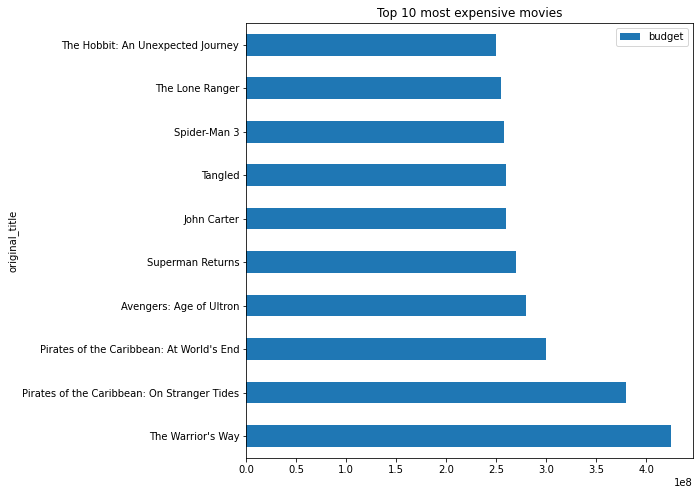

In [26]:
# create bar chart using df_bar function

df_bar(expensive_movies_df_clean[['budget']].head(10), "Top 10 most expensive movies")

In [27]:
#10 least expensive movies

expensive_movies_df_clean.tail(10)

,budget
original_title,
Concussion,0
Killing Kennedy,0
Rapture Palooza,0
A Single Shot,0
Generation Iron,0
Remember Sunday,0
Some Velvet Morning,0
Hammer of the Gods,0
Breakout,0


From the datasets above, we can see that the most expensive movie is **The Warrior's Way**. Also, some movies have budget reported as 0, this looks like a case of incomplete data and will need to be invstigated further.

<a id='conclusions'></a>
## Conclusions

**Results**: After the analysis, we can conclude that;

1. The most popular movie genre is **Adventure genre** and the least popular genre is Documentary.
2. There's a positive correlation between budget and revenue. This means that movies with high-budget tend to make more profit than low-budget movies.
3. Action movies generated the most revenue with over 173 billion dollars across the time period followed by Adventure with over 166 billion dollars.

**Limitations**

Since a movie can belong to more than one genre, this analysis isn't 100% dependable. It is important to note that since a movie can belong to multiple genres, the revenue above can overlap between different genres. The figures above indicate the total revenue that movies that belong to the genres specified have generated over the time period.

